**Exploratory data analysis** (*EDA*) is the starting and fundamental approach to any data analysis as it aims to understand the main characteristics of a data set before performing more advanced analysis or further modeling.

EDA involves the following:

- **Data visualization:** Using plots such as histogram, boxplots, scatter plots and many others to visualize the distribution of the data, the relationships between variables and any anomalies or peculiarities in the data.
- **Anomaly identification:** Detecting and sometimes dealing with outliers or missing data that could affect further analysis.
- **Hypothesis formulation:** From the scan, analysts can begin to formulate hypotheses that will then be tested in more detailed analysis or modeling.

The main purpose of EDA is to see what the data can tell us beyond the formal modeling task.

**Descriptive analysis and EDA**

Descriptive analysis and EDA, depending on where they are implemented, may be equivalent, but here we will distinguish them by their main differences:

- **Descriptive analysis:** Focuses on describing the main characteristics of a data set using *descriptive statistics*, such as **mean**, **median**, **range**, and so on. Provides a clear and summarized description of the data.
- **EDA:** Goes a step further, as it focuses on exploring *patterns*, *relationships*, *anomalies*, etc., in the data using more sophisticated **graphs** and statistics. Its main objective is to understand the **structure of the data**, relationships between variables and to formulate **hypotheses** or **intuitions** for further analysis or modeling.


**Machine Learning flow**

The ideal Machine Learning flow should contain the following phases:

- **Problem definition:** A *need* is identified to be solved using Machine Learning.
- **Data set acquisition:** Once the problem to be solved has been defined, a *data capture process* is necessary to solve it. For this, sources such as databases, APIs and data from cameras, sensors, etc. can be used.
- **Store the information:** The best way to store the information so that it can feed the Machine Learning process is to store it in a *database*. Flat files should be avoided as they are neither secure nor optimal. Consider including them in a database.
- **Descriptive analysis:** Raw data stored in a database can be a great and very valuable source of information. Before starting to simplify and exploit them with EDA, we must know their *fundamental statistical measures*: means, modes, distributions, deviations, and so on. Knowing the distributions of the data is vital to be able to select a model accordingly.
- **EDA:** This step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information. In addition, it allows us to *know and analyze the relationships between variables* and odd values.
- **Modeling and optimization:** With the data ready, all that remains is to *model the problem*. With the conclusions of the two previous steps we must analyze which model best fits the data and train it. Optimizing a model after the first training is absolutely necessary unless it performs without errors.
- **Deployment:** For the model to be able to bring value to our processes or to our customers, it must be consumable. Deployment is the *implementation of the model* in a controlled environment where it can be run and used to predict with real world data.


-------

# Let's explore EDA on data of passengers of the Titanic

# Step 1: Problem Statment and Data Collection**

To contextualize our exercise, let us imagine we have the following **problem statement**: 
    
- We want investigate what *features*, if any, are related to the *survival* of a passenger, or...
    
- We want to *predict the survival* of a passenger based on their information (i.e. features)

The data has already been **acquired** for us, and also **stored** on 4Geeks' GitHub

We'll load it form there with `pandas`

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The data has been split into *training* and *testing* data, we'll explore what this means later.

For now, just note that we want to combine, or *concatenate* the training and testing data back together into a full or total dataset.

In [243]:
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_test.csv")
test_survived_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/gender_submission.csv")
test_data["Survived"] = test_survived_data["Survived"]

###

total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [244]:
# Alternatively, seaborn has its own titanic dataset, but with fewer rows and slightly different columns
# sns.load_dataset('titanic')

# Step 2: Exploration and Data Cleaning**

Now that we have the data in a pandas dataframe we can do some initial exploration and cleaning.

Check the number of rows, and columns

In [245]:
# Obtain dimensions of dataframe
# (# rows, # coluns)
total_data.shape

(1309, 12)

We can always grab the column names if needed

In [246]:
total_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

And we can check information about the data types, and how many non-NaN rows exist for each column

In [247]:
total_data.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [248]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [249]:
total_data.isnull().sum(axis=0)

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Once we have obtained this information, it is important that we are able to draw conclusions, such as the following:

- There are a total of 1309 rows (in this case, people) and 12 columns, among which we find the **target** or **class** to predict, `Survived`.
- The variable `Cabin` only has 295 instances with values and 1014 null values. 
- The variable `Age` also has null values, but in a much smaller number (263) than the previous one. - The rest of the variables always have a value.
- The data has 7 **numerical** (`int64` or `float64`) characteristics and 5 **categorical** (`object`) characteristics.


We should note, though, that just because a column is **numeric** doesn't mean it is best described as a numerical feature. Sometimes it may be better thought of as categorical feature.

Let's look at the values a few of the columns can take to further investigate

1.) `Survived` is a **target** variable, meaning it is something we want a model to be able to predict if it were given a new, never-before-seen, passenger

It can take only one of two values:
- 0 : The passenger did not survive
- 1 : The passenger did survive
        
We could think of this as a categorical variable instead of a numerical variable (surviving vs not is a "category") **but** we'll keep it as a numerical feature.

Why? Models can only return numbers, and we want a future model to return this feature, so we can continue to think of it as a numerical feature.

In [250]:
total_data['Survived'].value_counts(normalize=True)

0    0.622613
1    0.377387
Name: Survived, dtype: float64

2.) `Pclass` is the class the passenger was in, 1st, 2nd, or 3rd class.

It can take one of three values:
- 1 : First Class
- 2 : Second Class
- 3 : Third Class
    
Since each number corresponds to a category of class, it may be better to think of `Pclass` as a **categorical** rather than **numerical** value.

Think of it this way: If we were to re-assign new numbers to each class, say we call first class 4, second class 2, and third class 0, would it really change the meaning of this feature?

In [251]:
total_data['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

3.) `SibSp` is the number of siblings or spouses the passenger had on the titanic. Since it is a count and not a category or classification, we can keep it as a numerical feature.

We could think of at a category, though as in practice it takes such few, discrete, values.

Our lesson plan in fact referes to it as a categorical varaible. In this case, the boundary between numeric and categorical is a little fuzzy.

More info can be found here: https://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf

In [252]:
total_data['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

4.) `Parch` is the number of parents or children the passenger had on the titanic. It is also a count, not a cateogry, so keep it as a numerical feature.

In [253]:
total_data['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

**Basic Descriptive Analysis**

We can also perform some basic descriptive analysis using `pandas`' `describe()` function.

In [254]:
total_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


**Eliminate Duplicates**

It is important to eliminated duplicated data in a dataframe before placing them in a model.

We will always need to take care to inspect duplicates.

If we use `duplicated()` as below, this will return to us all rows which are duplicates.
This will only give us a duplicate if *all* information across *all* columns are repeated.

Below, we can see, there are no duplicated rows

In [255]:
total_data.duplicated()#.sum()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

But, this isn't enough. It could be the case that there are duplicated people with different `PassengerId`s. This would be an error in the dataset as different `PassengerId`s should correspond to different people, but datasets can have errors so we must check.

In [256]:
total_data.drop("PassengerId", axis = 1)#.duplicated().sum()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Even after removing `PassengerId`, we see no duplicates.

But, we can continue by checking individual columns, just to be sure.

Let us check for duplicated names.

In [257]:
total_data['Name'].duplicated().sum()

2

In [258]:
total_data[total_data['Name'].duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
897,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


Using the `keep=True` parameter will return all rows (including the first) corresponding to duplicates,

In [259]:
total_data[total_data['Name'].duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
897,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


So there are two `Miss Kate Connolly's` and `Mr. James Kelly's`. 

Are these duplicates, or are there really two people each with these names?

Both Miss Connolly's survived, and both Mr. Kelly's did not. That may be a sign they are are actually the same.

But, they each have different ages, ticket numbers, fare prices, and there are two embarkment locations for Mr. Kelly.

So it is likely the case that these are four different people.

If we wanted to remove these duplicated names, we would run the following code:

In [260]:
#total_data = total_data.drop_duplicates(subset='Name')

**Eliminate Irrelevant Information**

For training a model, not all the columns/features in the dataset are necessary. Which information do we think is actually likely to predict if someone survived?

We can remove features that we don't believe have usueful information content, such as `PassengerID`. Does it really mean anything if a passenger is #103 vs #854?

We can also remove `Name`, `Ticket`, and `Cabin`. It is unlikely that someone's name was important for whether they lived or not, same with their `Ticket` number.

`Cabin` could be useful, but this is a string, and there are 186 different `Cabin` values. We'd have to find a way to convert these to numbers for a model to read. Also, most appear only once in the dataset. So we can remove them from our dataset.

In [261]:
total_data['Cabin'].nunique()

186

In [262]:
total_data['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

Drop these columns

In [263]:
total_data = total_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
total_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,NaN,0,0,8.0500,S


# Step 3: Analysis of Univariate Variables

First, we'll perform analysis of **univariate variables**. This means we'll analyze each single (*uni-*) variable at a time.

This can be done with histograms or boxplots.

We can divide this analysis into 

1.) **Categorical Variable Analysis**, and 

2.) **Numerical Variable Analysis**.

**Analysis on categorical variables**

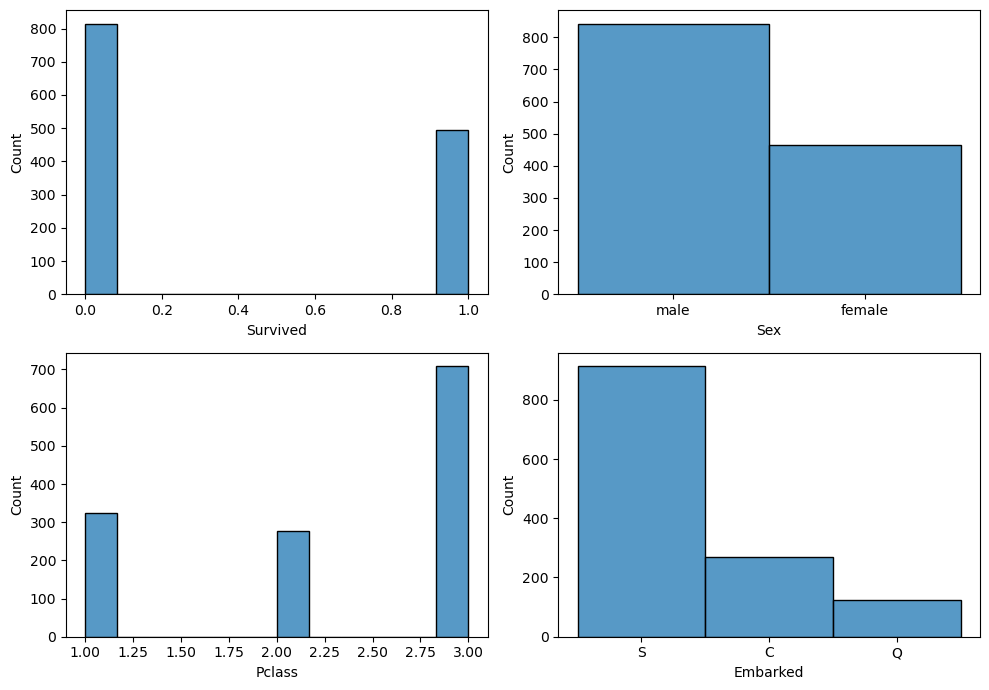

In [264]:
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "Survived")
sns.histplot(ax = axis[1, 0], data = total_data, x = "Pclass")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Sex")
sns.histplot(ax = axis[1, 1], data = total_data, x = "Embarked")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

FYI: C = Cherbourg; Q = Queenstown; S = Southampton

**Analysis on Numeric Variables**

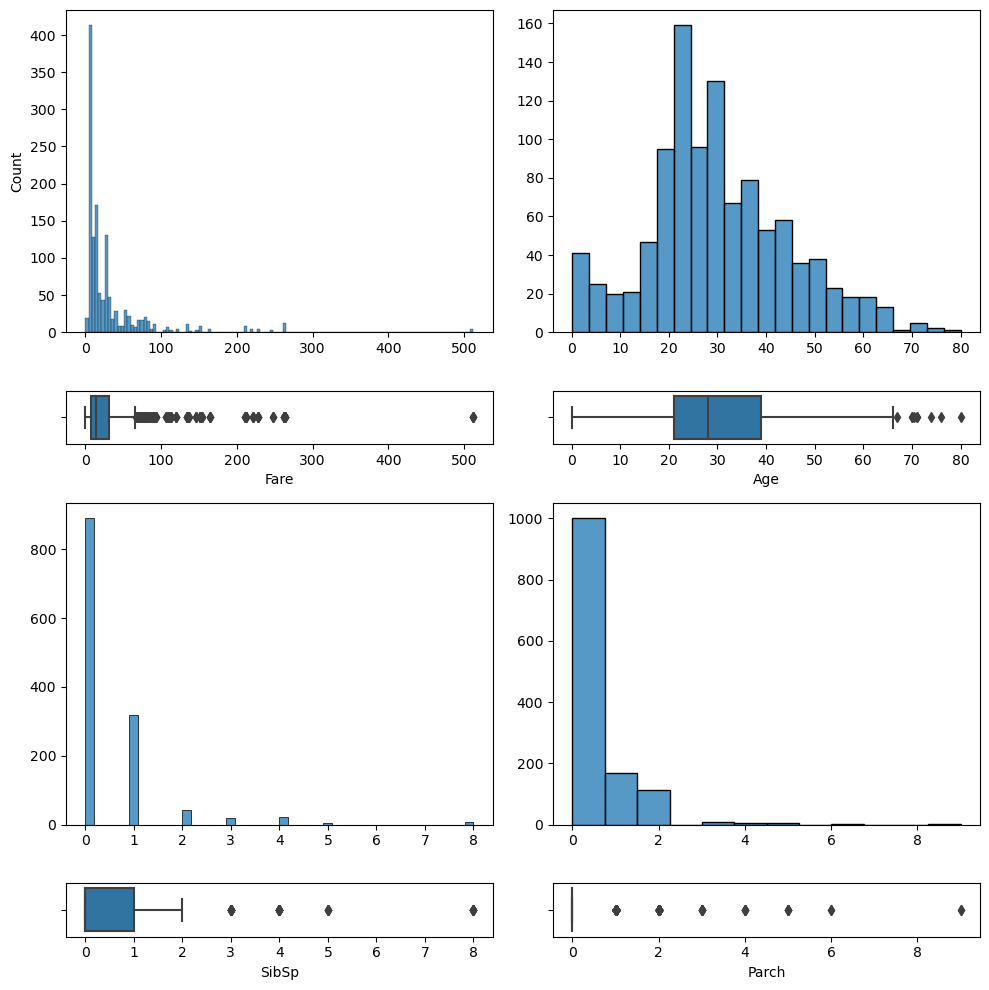

In [265]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "Fare").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Fare")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Age")

sns.histplot(ax = axis[2, 0], data = total_data, x = "SibSp").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "SibSp")
sns.histplot(ax = axis[2, 1], data = total_data, x = "Parch").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "Parch")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

We can see that all distributions appear to be asymmetric and right-skewed. The tail of outliers is to the right of the peak.

`Fare` is very skewed and has a few extreme outliers, while `Age` is less so.

*Note*: If we want to use `Fare` in a model we could try to log-transform it to "shrink" the outliers. But we don't need to do this step yet as some models can handle outliers better than others.

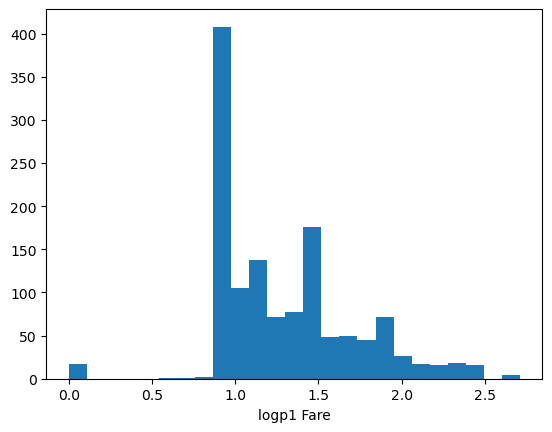

In [266]:
plt.hist(np.log10(total_data['Fare']+1), bins=25)
plt.xlabel('logp1 Fare')
plt.show()

# Step 4: Analysis of Multivariate Variables

After analyzing features one at a time, we can analyze them in relation to each other (*muli-*).

We'll also split this up into

1.) Numerical-Numerical Analysis, and

2.) Categorical-Categorical Analysis

3.) Numerical-Categorial Analysis

**Numerical-Numerical Analysis**

We'll start with comparing a numerical feature to another numerical feature. 

We'll use scatterplots and correlation analysis to do this.

Since we are interested in predicting the survival of each passenger, we'll compare each numerical 

In [267]:
numerical_features

['Age', 'SibSp', 'Parch', 'Fare']

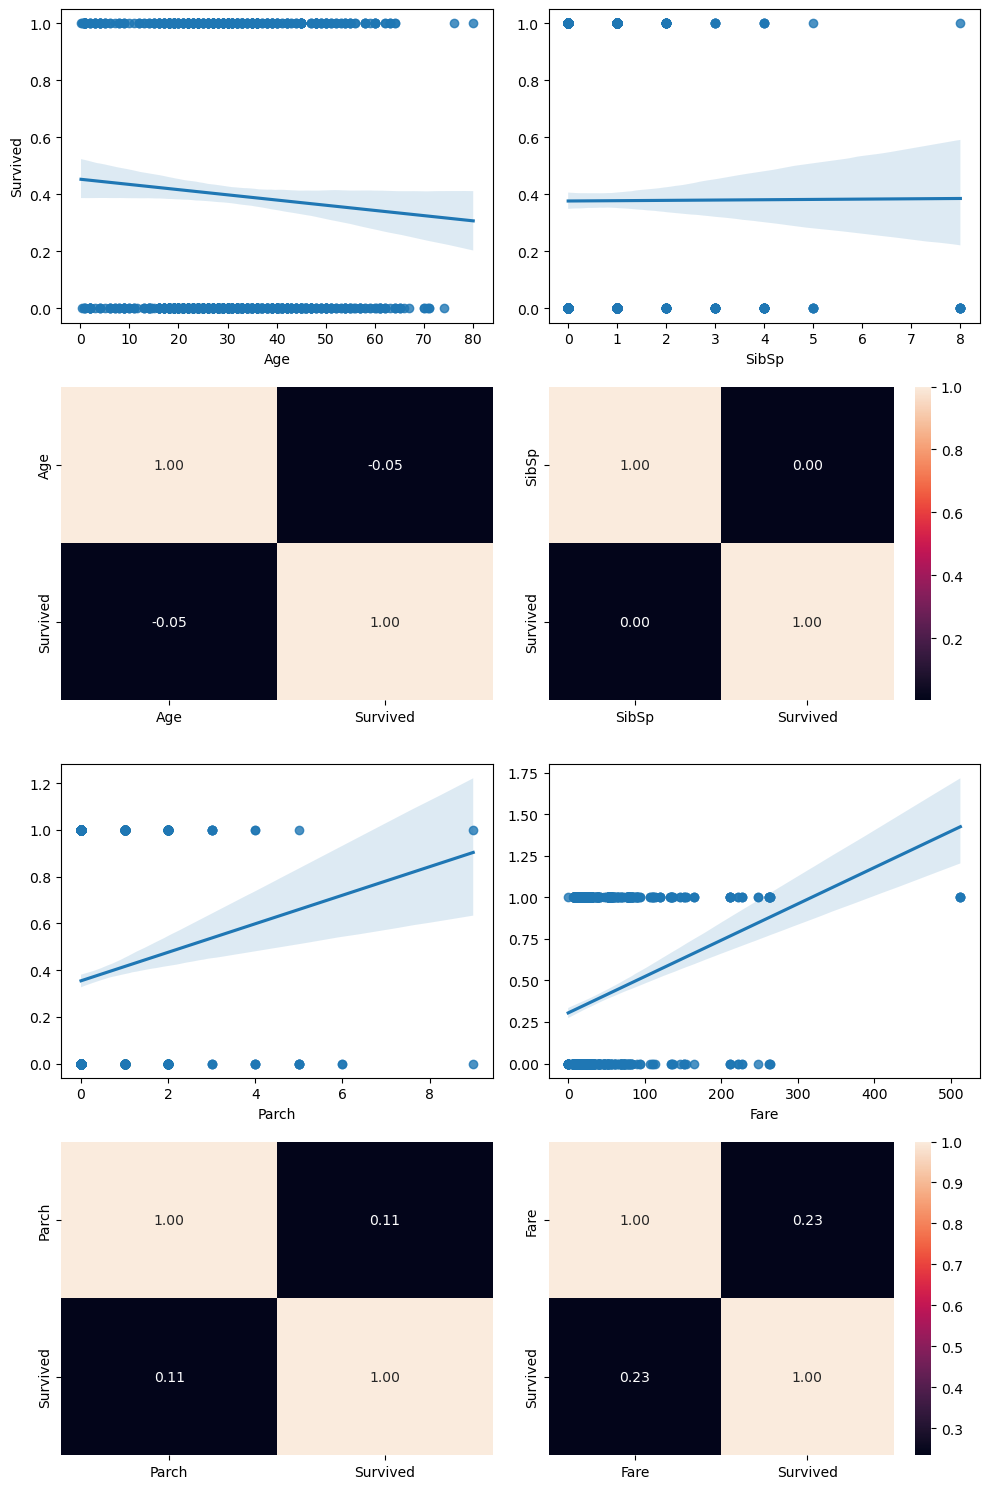

In [268]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "Age", y = "Survived")
sns.heatmap(total_data[["Age", "Survived"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "SibSp", y = "Survived").set(ylabel=None)
sns.heatmap(total_data[["SibSp", "Survived"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "Parch", y = "Survived").set(ylabel=None)
sns.heatmap(total_data[["Parch", "Survived"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar=False)

sns.regplot(ax = axis[2, 1], data = total_data, x = "Fare", y = "Survived").set(ylabel=None)
sns.heatmap(total_data[["Fare", "Survived"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])



# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

The off-diagonal values of the correlation map tell us how strongly correlated, or anti-correlated the features are to `Survived`. 

The correlation coefficients go from -1 to +1. For `Fare` is appears there is a correlation, the higher the fare price the more likely the passenger is to survive. But it is not very strong, only 0.23 out of 1.

None of these are decisive.

We can also do a *numerical-numerical analysis** on any two given numerical features, we don't have to compare each to `Survived`

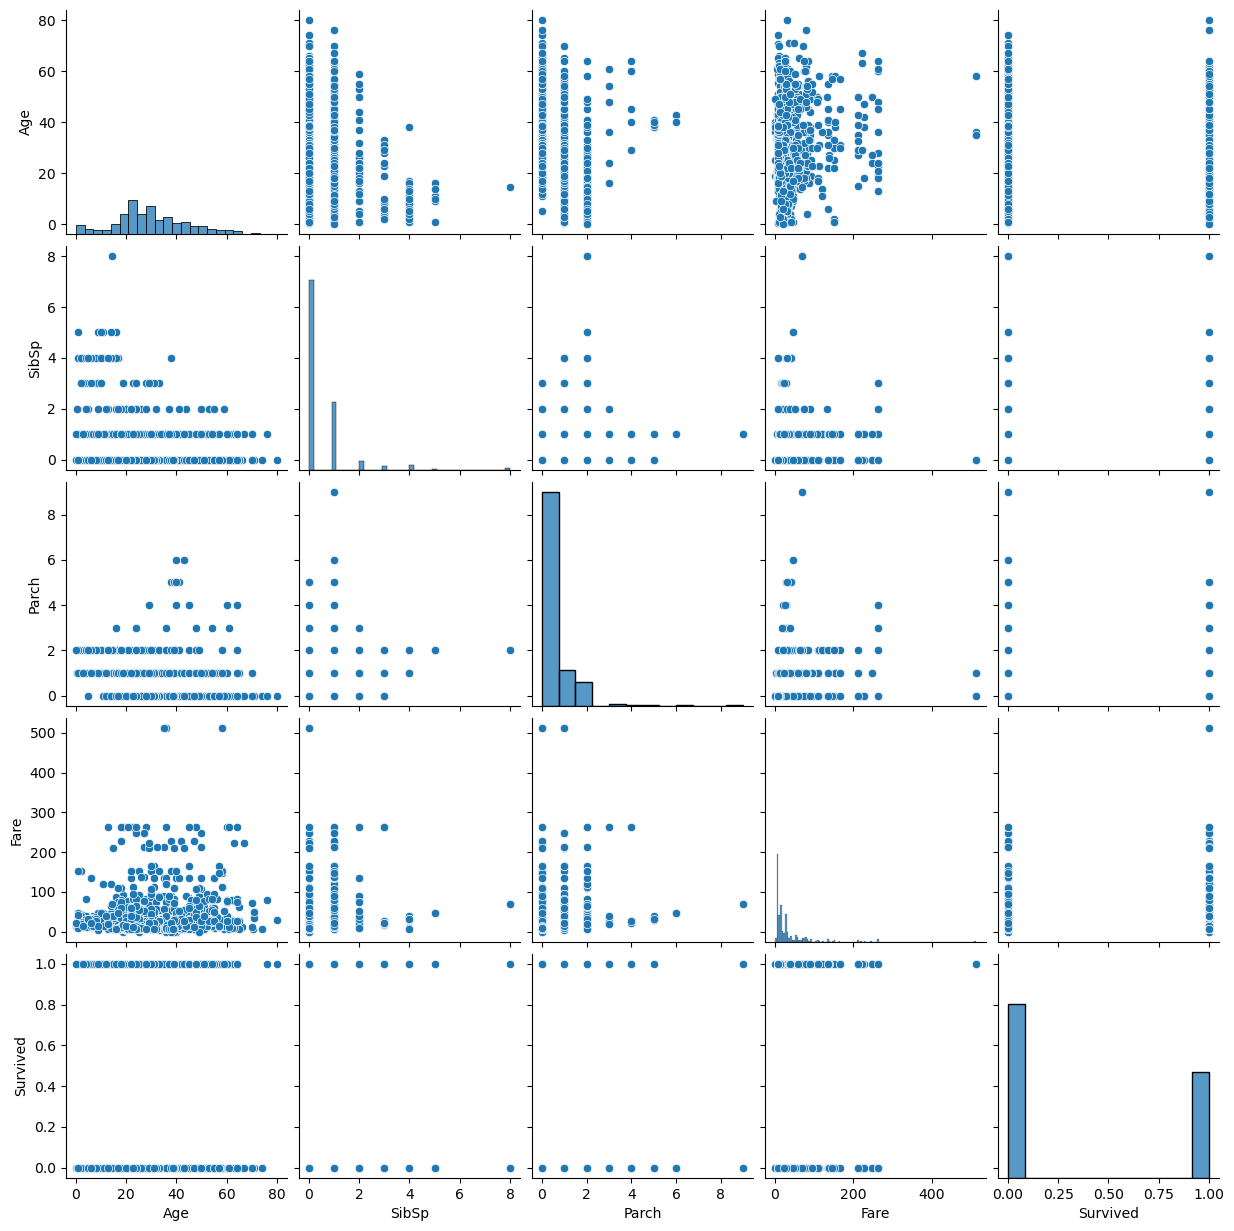

In [269]:
# Warning! Pairplots can be slow!
sns.pairplot(data = total_data[numerical_features + ['Survived']])

<Axes: >

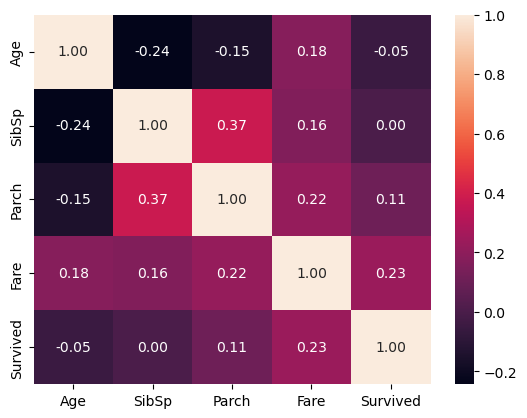

In [270]:
sns.heatmap(total_data[numerical_features + ['Survived']].corr(), annot = True, fmt = ".2f")

**Categorical-categorical analysis**

We can now compare categorical data to other categorical data

First, let's compare some of the categoricla data with the `Survived` target, since that is what we want to predict.

We'll use `sns.countplot` to make bar plots of the categorical data, and we'll use `hue = "Survived"` to further divide the bar plots into `Survived=0` vs `Survived=1`

In [271]:
categorical_features

['Survived', 'Pclass', 'Sex', 'Embarked']

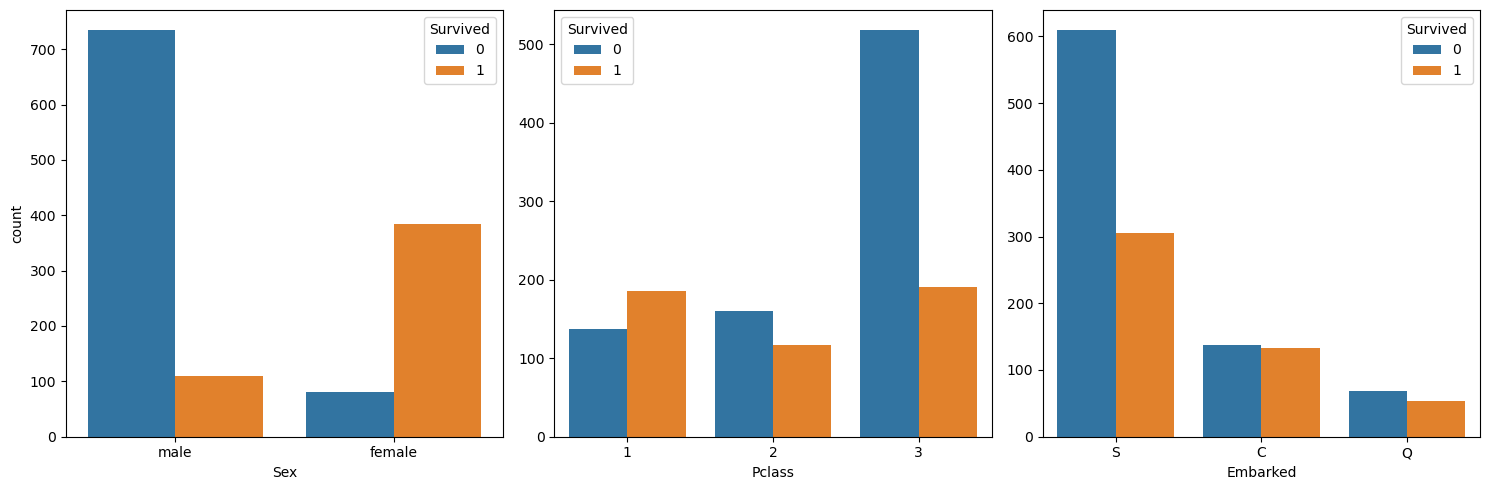

In [272]:
fig, axis = plt.subplots(1,3, figsize = (15, 5))

sns.countplot(ax = axis[0], data = total_data, x = "Sex", hue = "Survived")
sns.countplot(ax = axis[1], data = total_data, x = "Pclass", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[2], data = total_data, x = "Embarked", hue = "Survived").set(ylabel = None)

plt.tight_layout()

plt.show()

The following conclusions can be drawn from the above graph:

- With higher proportion women survived as opposed to men. This is because women had priority over men in the evacuation plans.
- Those who traveled in a better class on the Titanic had a higher chance of survival.

We can also compare multiple variables at the same time.

The below compares three variables at once, the `Sex`, the `Pclass`, and `Survived`.

Note we use `sns.barplot` here.

<Axes: xlabel='Sex', ylabel='Survived'>

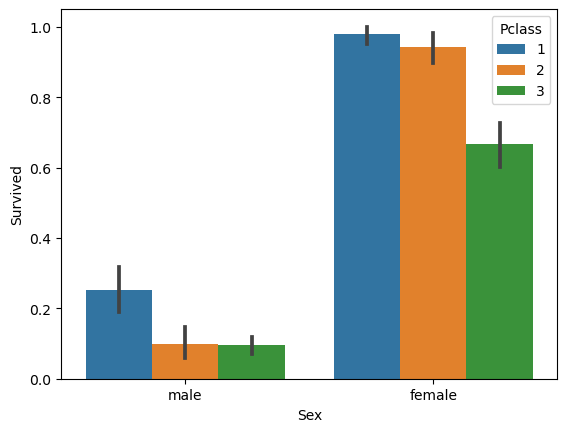

In [273]:
sns.barplot(data = total_data, x = "Sex", y = "Survived", hue = "Pclass")

We can also do a correlation analysis between all categorical variables

It can help to turn the `Sex` and `Embarked` into numerical values so calculations can be done on them.

In [274]:
total_data["Sex_n"] = pd.factorize(total_data["Sex"])[0]
total_data["Embarked_n"] = pd.factorize(total_data["Embarked"])[0]

In [275]:
total_data[['Sex', 'Sex_n']]

,Sex,Sex_n
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
1304,male,0
1305,female,1
1306,male,0
1307,male,0


In [276]:
categorical_features = ['Survived', 'Pclass', 'Sex_n', 'Embarked_n']

<Axes: >

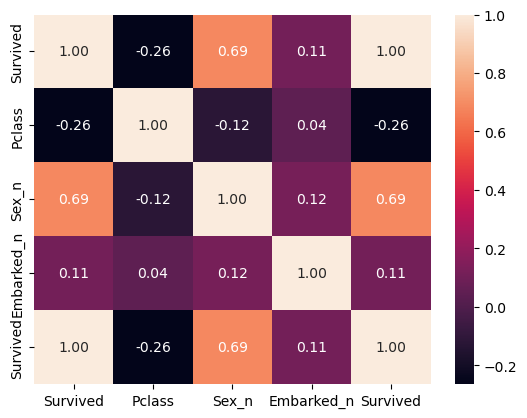

In [277]:
sns.heatmap(total_data[categorical_features + ['Survived']].corr(), annot = True, fmt = ".2f")

This also hints that there is a relation between the class and the survival of a passenger

And we can also see a strong correlation between the `Sex` and the `Survival`, now that we are working with a numerical version of `Sex`.

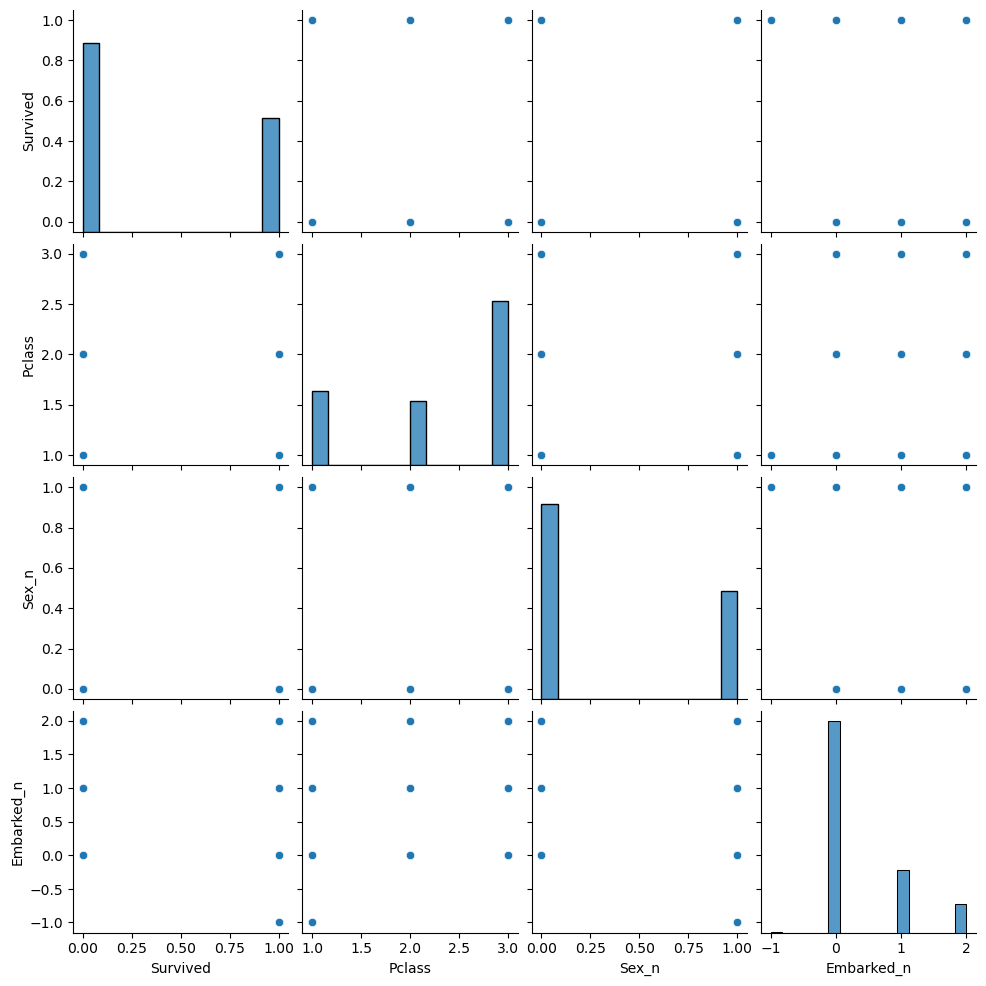

In [278]:
# Warning! Pairplots can be slow!
# And not too useful for categorical data
sns.pairplot(data = total_data[categorical_features])

**Numerical-Categorical Analysis**

In [279]:
numerical_features

['Age', 'SibSp', 'Parch', 'Fare']

In [280]:
categorical_features

['Survived', 'Pclass', 'Sex_n', 'Embarked_n']

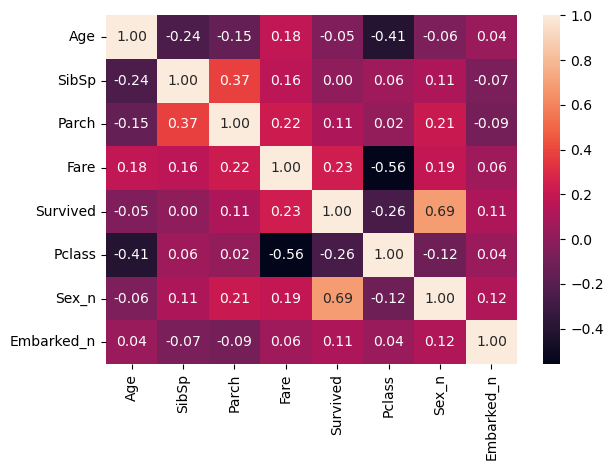

In [281]:
sns.heatmap(total_data[numerical_features + categorical_features].corr(), annot = True, fmt = ".2f")
plt.tight_layout()

There is a strong negative relationship between class type (`Pclass`) and passenger age (`Age`) (those traveling in first class were older) and between class and fare paid (`Fare`), which makes a lot of sense. The rest of the correlations remain the same as previously seen.

We can investigate these in more detail

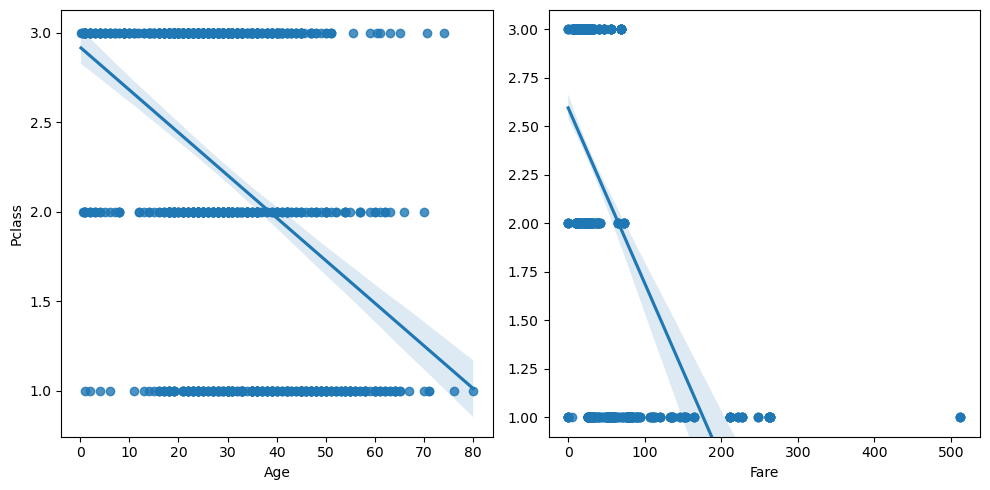

In [282]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = total_data, x = "Age", y = "Pclass")
sns.regplot(ax = axis[1], data = total_data, x = "Fare", y = "Pclass").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

# Day 2

# Step 5: Feature Engineering and Training and Testing Data

**Feature engineering** is a process that involves the creation of new features (or variables) from existing ones to improve model performance. This may involve a variety of techniques such as normalization, data transformation, and so on. 

We will also check for **outliers** and investigate **missing values** as well.

In order to do feature engineering we must first further prepare out data for a model by splitting into a **training set** and a **testing set**

This step is inevitable for most machine learning models, and we want to perform this step before doing any **feature engineering**. We will explain why, shortly, but first let us explore what training and testing data is used for.

See: https://docs.google.com/presentation/d/1QUEo3wdIpbp9_QzA0byZyG_S6_8wEdT5RMFo7cqxedw/edit?usp=sharing


**Outliers Analysis**

For **Outlier Analysis** we can look at the min and max compared to the mean or the 25% and 75% quartiles of the data.



In [283]:
total_data.describe().loc[['mean', 'min', '25%', '75%', 'max']]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_n,Embarked_n
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479,0.355997,0.392666
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,2.000000


Fare looks suspicious

We can also use boxplots

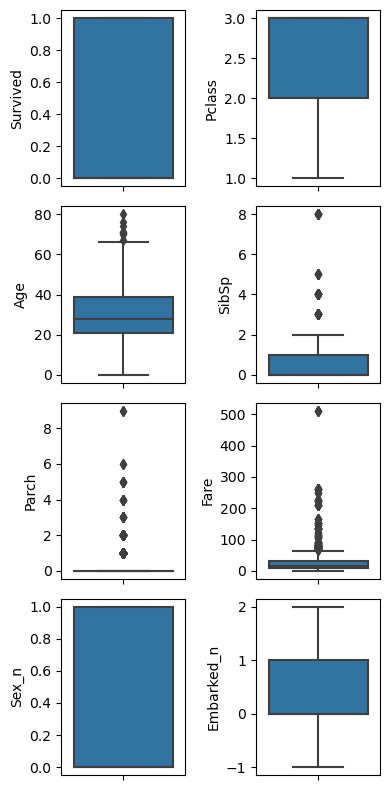

In [284]:
#plt.rcParams['figure.dpi'] = 100
fig, axis = plt.subplots(4, 2, figsize = (4, 8))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Survived")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Pclass")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "Age")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "SibSp")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "Parch")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "Fare")
sns.boxplot(ax = axis[3, 0], data = total_data, y = "Sex_n")
sns.boxplot(ax = axis[3, 1], data = total_data, y = "Embarked_n")

plt.tight_layout()

plt.show()

We can argue that `Age`, `SibSp`, `Parch` and `Fare` have outliers (beyond the 25% and 75% range)

But we definitely see `Fare` as having outliers. There is one major outlier of `Fare` $\approx$ 500

*One method* of determining outliers is to use the *interquartile range (IQR)*.

Let's do this for `Fare`.

Let $Q_{25\%}$ be the 25% quantile (the value for which 25% of `Fare` data is less than)

and $Q_{75\%}$ be the 75% quantile (the value for which 75% of `Fare` data is less than)

Then the $\textrm{IQR}$ is $Q_{75\%} - Q_{25\%}$

A `Fare` datum is considered an outlier if...

... it is less than $Q_{25\%} - 1.5\ \textrm{IQR}$

... or it is greater than $Q_{75\%} + 1.5\ \textrm{IQR}$

In [285]:
Q_25 = total_data['Fare'].quantile(0.25)
Q_75 = total_data['Fare'].quantile(0.75)

IQR = Q_75 - Q_25

upper_limit = Q_75 + 1.5 * IQR
lower_limit = Q_25 - 2.5 * IQR


print(f"The upper and lower limits for finding Fare outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(IQR, 2)}")


The upper and lower limits for finding Fare outliers are 66.34 and -50.55, with an interquartile range of 23.38


Though we don't have to use this definition.

In fact, it may be that very expensive fares are actually very important for a model.

Expensive fares may be a good indicator of richer, first class passengers, who may be more likely to survive.

In [286]:
total_data[total_data['Fare'] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
258,1,1,female,35.0,0,0,512.3292,C,1,1
679,1,1,male,36.0,0,1,512.3292,C,0,1
737,1,1,male,35.0,0,0,512.3292,C,0,1
1234,1,1,female,58.0,0,1,512.3292,C,1,1


... and if we look at these high fares, we do see they all survived. So perhaps high `Fare` can be useful to predicting survival.

So what should we do with outliers? 

We have a few options:

1.) **Maintain** outliers: 

- In some cases, outliers contain valuable information and may represent rare but valid instances in the dataset. By maintaining them, you ensure that your model is exposed to these instances during training. Some models, such as Random Forest, are also less impacted by outliers.

- But, outliers can disproportionately influence model parameters and predictions, leading to poor generalization performance. Some models, such as linear regression, are sensitive to outliers.

2.) **Eliminate** outliers:

- Those rows with outliers can be removed from the dataset. However, if there are many outliers, this strategy may cause a large part of the available information to be lost

3.) **Replace** outliers:

- If we do not want to remove an entire row due to the presence of outliers in one of the features, we can replace the outlier by the *mean*, *median* or we can set it to the $Q_{25\%}$ or $Q_{75\%}$ value. But this is subjective and may not acuratley caputer the true nature of the data.

4.) **Transform** the feature:

- We could try to transform the entire feature using log-transformations, normalization, etc., to reduce the size of any outliers. But such transformations may not be suitable for the feature, or may make it difficult to interpret.

See https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/how-to-deal-with-outliers.md for more info

For our data, high fares do seem to be meaningful, so we'll keep them.

In [287]:
# An example of replacing Fare value above Q_75 + 1.5 IQR with the Q_75 value
#total_data.loc[total_data['Fare'] > upper_limit, 'Fare'] = Q_75

**Missing Value Analysis**

A **missing value** is a space that has no value assigned ot in. These can arise from errors in data collection, a refusal to answer in a survey, or the information is not avaiable or applicable.

Most models can not handle `NaN`s or `None`s and so we must investigate any missing values and deal with them.

What are our options?


1.) **Eliminate** them:
- Similar to the previous case of outliers. We may remove valuable rows, though!

2.) **Numerical imputation**: 
- We can fill in the missing values in a numerical variable, normally the procedure is to use the statistical values of the sample. The most common is to *impute* it using the mean, mode or median of that characteristic.

3.) **Categorical imputation**: 
- When the column is categorical, it is usually filled by taking the element of the highest or best category.


As shown in Day 1, we chan check using `isnull()`

In [288]:
total_data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           263
SibSp           0
Parch           0
Fare            1
Embarked        2
Sex_n           0
Embarked_n      0
dtype: int64

We can also show this as a percent of the total number of rows

In [289]:
(total_data.isnull().sum().sort_values() / len(total_data) * 100).round(3)

Survived       0.000
Pclass         0.000
Sex            0.000
SibSp          0.000
Parch          0.000
Sex_n          0.000
Embarked_n     0.000
Fare           0.076
Embarked       0.153
Age           20.092
dtype: float64

In [290]:
total_data[total_data['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
61,1,1,female,38.0,0,0,80.0,NaN,1,-1
829,1,1,female,62.0,0,0,80.0,NaN,1,-1


In [291]:
total_data[total_data['Fare'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
1043,0,3,male,60.5,0,0,NaN,S,0,0


In [292]:
total_data[total_data['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
5,0,3,male,NaN,0,0,8.4583,Q,0,2
17,1,2,male,NaN,0,0,13.0000,S,0,0
19,1,3,female,NaN,0,0,7.2250,C,1,1
26,0,3,male,NaN,0,0,7.2250,C,0,1
28,1,3,female,NaN,0,0,7.8792,Q,1,2
...,...,...,...,...,...,...,...,...,...,...
1299,1,3,female,NaN,0,0,7.7208,Q,1,2
1301,1,3,female,NaN,0,0,7.7500,Q,1,2
1304,0,3,male,NaN,0,0,8.0500,S,0,0
1307,0,3,male,NaN,0,0,8.0500,S,0,0


Many of these outliers are in the `Age` feature! In fact 20% of `Age` are NaNs! We'll have to deal with this somehow. 

If we removed all of our `Age`-NaNs, we'd end up removing 20% of our dataset! So it's best to replace, or *impute*, the missing `Age` values.

There are also NaNs in the `Fare` and `Embarked` features, much less, only 1 and 2 respectively. We could remove these rows, or impute the NaNs with a value.

In [302]:
# Impute the missing ages with the median-age value
median_age = total_data['Age'].median()
total_data['Age'] = total_data['Age'].fillna(median_age)

# Impute the missing embarked with the median-age value
median_fare = total_data['Fare'].median()
total_data['Fare'] = total_data['Fare'].fillna(median_fare)

We must take extra care with the `Embarked` feature, though! Why? Because it is a categorical value!

We have two columns for embarkment location, the original `Embarked` column which contains a categorical string, Q, S, or C.

And a custom-made `Embarked_n` feature which converts the above strings to a number. 

If replacing missing `Embarked` and/or `Embarked_n` values, we should use the most common category, i.e. the *mode*.

In [303]:
mode_embarked = total_data['Embarked'].mode().iloc[0] # Must use .iloc[0] because .mode() returns a Series
total_data['Embarked'] = total_data['Embarked'].fillna(mode_embarked)

mode_embarked_n = total_data['Embarked_n'].mode().iloc[0] # Must use .iloc[0] because .mode() returns a Series
total_data['Embarked_n'] = total_data['Embarked_n'].fillna(mode_embarked_n)

Check the NaNs again

In [304]:
total_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Sex_n         0
Embarked_n    0
dtype: int64